#Paquetes necesarios

In [2]:
# os is used for Ilka's linux :)
import os
os.environ["QT_QPA_PLATFORM"] = "xcb"

import cv2  
import numpy as np
import matplotlib.pyplot as plt

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el máximo para filas y columnas (uno para cada) y muestra el número de filas con un número de píxeles blancos mayor o igual que 0.95*máximo.

maximum number of white pixels in a row: 56100
rows with 95% white pixels of maxmimum number of white pixels:
12
100

maximum number of white pixels in a column: 47685
columns with 95% white pixels of maxmimum number of white pixels:
92
99
104
115
119
383


(0.0, 512.0)

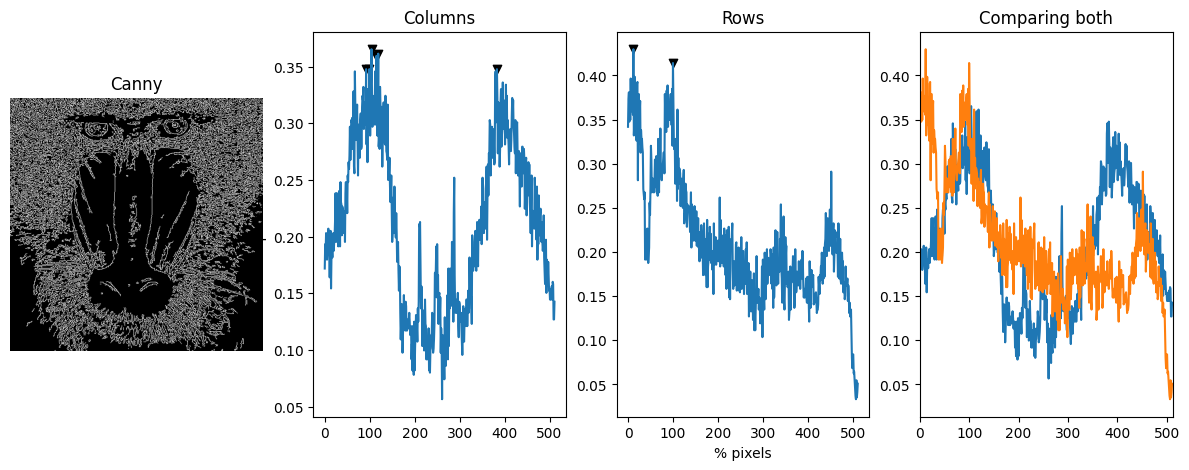

In [7]:
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

#Máximo de pixeles blancos por filas (255)
row_counts = cv2.reduce(canny,1,cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts / (255 * canny.shape[1])

print('maximum number of white pixels in a row:', max(row_counts)[0])
print('rows with 95% white pixels of maxmimum number of white pixels:')
rows95 = []
for i in range(0,len(rows)): 
    if (rows[i] >= 0.95*max(rows)) : 
        print(i)
        rows95.append(i)
print()

#Máximo de pixeles blancos por columnas (255)
col_counts = cv2.reduce(canny, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * canny.shape[1])


print('maximum number of white pixels in a column:', max(col_counts[0]))
print('columns with 95% white pixels of maxmimum number of white pixels:')
cols95 = []
for i in range(0,len(cols)): 
    if (cols[i] >= 0.95*max(cols)) : 
        print(i)
        cols95.append(i)


#Muestra dicha cuenta gráficamente
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 4, 2)
plt.title("Columns")
plt.ylabel("% píxeles")
plt.plot(cols)
plt.scatter(cols95, [cols[i] for i in cols95], color='black', marker="v")


plt.subplot(1,4,3)
plt.title("Rows")
plt.xlabel("% pixels")
plt.plot(rows)
plt.scatter(rows95, [rows[i] for i in rows95], color='black', marker="v")


plt.subplot(1,4,4)
plt.title("Comparing both")
plt.plot(cols)
plt.plot(rows)

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])

sobel image

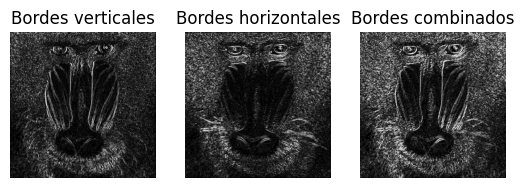

In [15]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Muestra ambos resultados
plt.figure()
plt.subplot(1, 3, 1)
plt.axis("off")
plt.title('Bordes verticales')
#Verticales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobelx), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 2)
plt.axis("off")
plt.title('Bordes horizontales')
#Horizontales
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobely), cmap='gray') 
#plt.imshow(sobelx, cmap='gray') #Prueba sin convertir escala

plt.subplot(1, 3, 3)
plt.axis("off")
plt.title('Bordes combinados')
#Para visualizar convierte a escala manejable en una imagen de grises
plt.imshow(cv2.convertScaleAbs(sobel), cmap='gray') 
#plt.imshow(sobel, cmap='gray') #Prueba sin convertir escala
plt.show()

TAREA: Aplica umbralizado a la imagen resultante de Sobel (valores 0 a 255 y convertida a 8 bits por ejemplo sobel8 = np.uint8(sobel)), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny. Calcula los máximos por filas y columnas, y determina las filas y columnas por encima del 0.95*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

maximum number of white pixels in a row: 58395
rows with 95% white pixels of maxmimum number of white pixels:
2
3
4
8
12
24
82
83
100

maximum number of white pixels in a column: 58395
columns with 95% white pixels of maxmimum number of white pixels:
104
105
127
288


(0.0, 512.0)

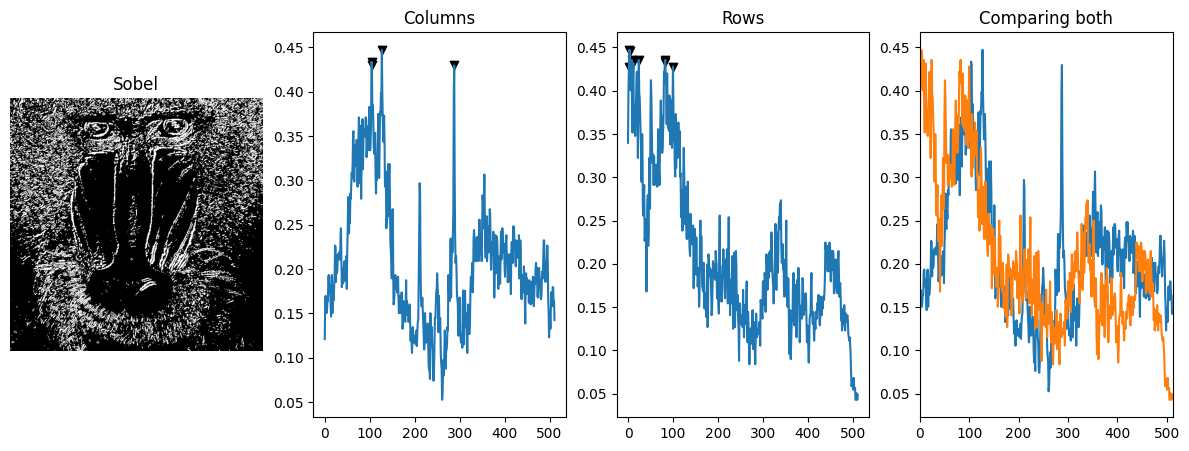

In [24]:
valorUmbral = 40

# convert sobel to uint8 
# Convert Sobel to absolute values (if there are negative values)
sobel_abs = np.abs(sobel)

# Normalize the Sobel output to range [0, 255]
sobel_norm = cv2.normalize(sobel_abs, None, 0, 255, cv2.NORM_MINMAX)

# Convert the normalized image to uint8
sobel_uint8 = np.uint8(sobel_norm)

# change sobel to sobel image
res, imagenUmbralizada = cv2.threshold(sobel_uint8, valorUmbral, 255, cv2.THRESH_BINARY) 

row_counts = cv2.reduce(imagenUmbralizada,1,cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
rows = row_counts / (255 * imagenUmbralizada.shape[1])

print('maximum number of white pixels in a row:', max(row_counts)[0])
print('rows with 95% white pixels of maxmimum number of white pixels:')
rows95 = []
for i in range(0,len(rows)): 
    if (rows[i] >= 0.95*max(rows)) : 
        print(i)
        rows95.append(i)
print()


#Máximo de pixeles blancos por columnas (255)
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)
cols = col_counts[0] / (255 * imagenUmbralizada.shape[1])

print('maximum number of white pixels in a column:', max(col_counts[0]))
print('columns with 95% white pixels of maxmimum number of white pixels:')
cols95 = []
for i in range(0,len(cols)): 
    if (cols[i] >= 0.95*max(cols)) : 
        print(i)
        cols95.append(i)



#Muestra dicha cuenta gráficamente
plt.figure(figsize=(15,5))
plt.subplot(1, 4, 1)
plt.axis("off")
plt.title("Sobel")
plt.imshow(imagenUmbralizada, cmap='gray') 

plt.subplot(1, 4, 2)
plt.title("Columns")
plt.plot(cols)
plt.scatter(cols95, [cols[i] for i in cols95], color='black', marker="v")


plt.subplot(1,4,3)
plt.title("Rows")
plt.plot(rows)
plt.scatter(rows95, [rows[i] for i in rows95], color='black', marker="v")


plt.subplot(1,4,4)
plt.title("Comparing both")
plt.plot(cols)
plt.plot(rows)

#Rango en x definido por las columnas
plt.xlim([0, canny.shape[0]])


Los resultados obtenidos son muy diferentes, ya que un método invierte el blanco y negro en comparación con el otro. Sin embargo, los resultados no se invierten, ya que las imágenes se basan en métodos diferentes (Canny -visualización de bordes- y sobel -generación de una imagen basada en un valor umbral-).


TAREA: Proponer un demostrador que capture las imágenes de la cámara, y les permita exhibir lo aprendido en estas dos prácticas ante quienes no cursen la asignatura :). Es por ello que además de poder mostrar la imagen original de la webcam, incluya al menos dos usos diferentes de aplicar las funciones de OpenCV trabajadas hasta ahora.


In [12]:
vid=cv2.VideoCapture(0)

# Initialize background remover for project 2
eliminadorFondo = cv2.createBackgroundSubtractorMOG2(history=100, varThreshold=50, detectShadows=True)

while(True):
    # fotograma a fotograma
    ret, frame = vid.read()

    if ret: 
        #Dimensiones imagen de entrada   

        h, w, c = frame.shape 
    
        collage = np.zeros((h,w*3,3), dtype = np.uint8)
        original = collage[0:h,0:w]
        first    = collage[0:h,w:w*2]
        second   = collage[0:h,w*2:w*3]

        r = frame[:,:,2] 
        g = frame[:,:,1]
        b = frame[:,:,0]

        #Separamos canales
        original[:,:,0] = b 
        original[:,:,1] = g
        original[:,:,2] = r

        # video from  project 1
        first[:,:,0] = 255 - r 
        first[:,:,1] = g - 30
        first[:,:,2] = b

        # video from project 2
        # Aplica efecto espejo sobre la entrada
        framem=frame

        
        #Con un segundo parámerto se puede definir una máscara con zonas a actualizar
        second = eliminadorFondo.apply(framem)
        second = eliminadorFondo.apply(framem, second)  #No actualiza el fondo
        second = cv2.cvtColor(second, cv2.COLOR_GRAY2BGR) # convert to colors
        collage[0:h,w*2:w*3] = second

        cv2.imshow('demo', cv2.resize(collage, (int(w*3/2),int(h/2)),cv2.INTER_NEAREST))
    
    if cv2.waitKey(20) == 27:
        break
# Libera el objeto de captura
vid.release()
# Destruye ventanas
cv2.destroyAllWindows()


TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) plantear una reinterpretación de la parte de procesamiento de la imagen tomando como punto de partida alguna de dichas instalaciones.

In [11]:
cap = cv2.VideoCapture(0)

eliminador = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=100, detectShadows=True)

ret, frame = cap.read()
h, w, _ = frame.shape
fading_layer = np.zeros((h, w, 3), dtype=np.uint8)

degree_of_fading = 0.9
                        
while True:
    
    ret, frame = cap.read()
    
    if ret:

        movement = eliminador.apply(frame)

        # smooth to remove noise
        blurred = cv2.GaussianBlur(movement, (5, 5), 0)

        # find contours
        contours, _ = cv2.findContours(blurred, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        # init min/max
        min_x, min_y = float('inf'), float('inf')
        max_x, max_y = 0, 0

        for contour in contours:
            # only consider big contours (to avoid noise)
            if cv2.contourArea(contour) > 500:
                # calculate bounding box
                x, y, w, h = cv2.boundingRect(contour)

                # update min/max for the combindend bb
                min_x = min(min_x, x)
                min_y = min(min_y, y)
                max_x = max(max_x, x + w)
                max_y = max(max_y, y + h)

        # validity check
        if min_x < max_x and min_y < max_y:
            # pintar
            cv2.rectangle(frame, (min_x, min_y), (max_x, max_y), (255, 255, 0), -1)
            cv2.rectangle(fading_layer, (min_x, min_y), (max_x, max_y), (255, 255, 0), -1)

        fading_layer = cv2.addWeighted(fading_layer, degree_of_fading, np.zeros_like(fading_layer), 0, 0)

        frame = cv2.addWeighted(frame, 1, fading_layer, 1, 0)
        cv2.imshow('cortina movil', frame)

    # Detenemos pulsando ESC
    if cv2.waitKey(20) == 27:
        break

cap.release()
cv2.destroyAllWindows()
